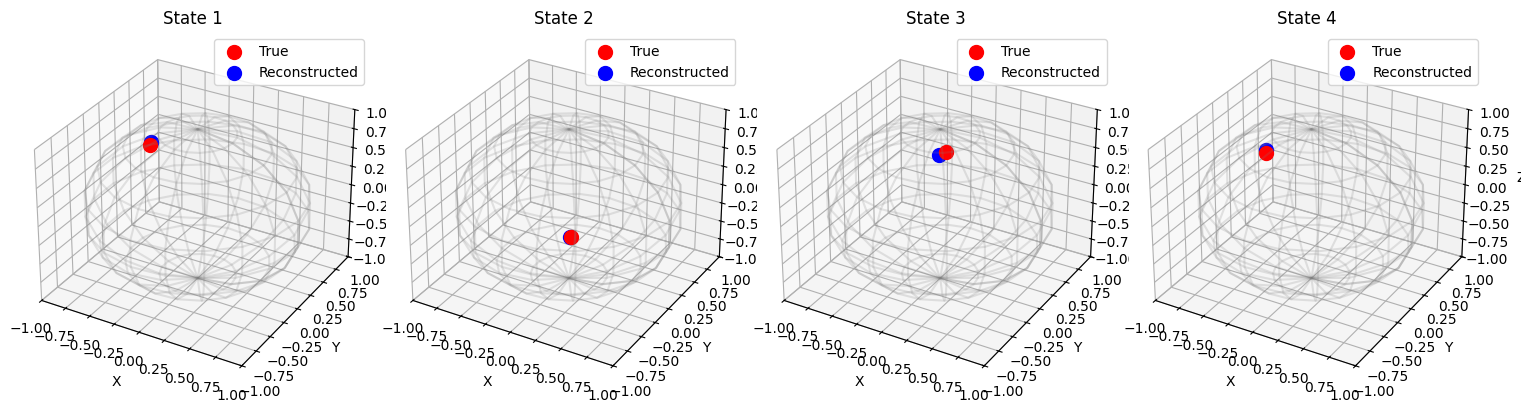

Number of results obtained: 4
Total time used: 0.80 units
Coherence time: 1.00 units
Fidelity of state 1: 1.0095
Fidelity of state 2: 1.0339
Fidelity of state 3: 1.0019
Fidelity of state 4: 1.0173


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def create_random_state():
    # Create a random pure state on the Bloch sphere
    theta = np.arccos(np.random.uniform(-1, 1))
    phi = np.random.uniform(0, 2*np.pi)
    return np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])

def measure_in_basis(state, basis):
    # Simulate measurement in X, Y, or Z basis
    if basis == 'X':
        prob = (1 + state[0]) / 2
    elif basis == 'Y':
        prob = (1 + state[1]) / 2
    else:  # Z basis
        prob = (1 + state[2]) / 2
    return 1 if np.random.random() < prob else 0

def quantum_state_tomography(true_state, num_measurements):
    measurements = []
    bases = ['X', 'Y', 'Z']
    
    for _ in range(num_measurements):
        basis = np.random.choice(bases)
        outcome = measure_in_basis(true_state, basis)
        measurements.append((basis, outcome))
    
    # Reconstruct the state
    sx = sum(2*o - 1 for b, o in measurements if b == 'X') / (num_measurements // 3)
    sy = sum(2*o - 1 for b, o in measurements if b == 'Y') / (num_measurements // 3)
    sz = sum(2*o - 1 for b, o in measurements if b == 'Z') / (num_measurements // 3)
    
    return np.array([sx, sy, sz])

def simulate_extended_coherence(num_results, coherence_time, manipulation_time):
    results = []
    total_time = 0
    
    while len(results) < num_results and total_time < coherence_time:
        true_state = create_random_state()
        reconstructed_state = quantum_state_tomography(true_state, 3000)
        results.append((true_state, reconstructed_state))
        total_time += manipulation_time
    
    return results, total_time

# Simulation parameters
num_desired_results = 4
coherence_time = 1.0  # arbitrary units
manipulation_time = 0.2  # arbitrary units

# Run the simulation
simulation_results, total_time = simulate_extended_coherence(num_desired_results, coherence_time, manipulation_time)

# Visualize results
fig = plt.figure(figsize=(15, 5))

for i, (true_state, reconstructed_state) in enumerate(simulation_results):
    ax = fig.add_subplot(1, len(simulation_results), i+1, projection='3d')
    
    # Plot unit sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="gray", alpha=0.2)
    
    # Plot true state
    ax.scatter(true_state[0], true_state[1], true_state[2], c='r', s=100, label='True')
    
    # Plot reconstructed state
    ax.scatter(reconstructed_state[0], reconstructed_state[1], reconstructed_state[2], c='b', s=100, label='Reconstructed')
    
    ax.set_title(f"State {i+1}")
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.set_zlim(-1, 1)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.legend()

plt.tight_layout()
plt.show()

# Print timing information
print(f"Number of results obtained: {len(simulation_results)}")
print(f"Total time used: {total_time:.2f} units")
print(f"Coherence time: {coherence_time:.2f} units")

# Calculate and print fidelities
for i, (true_state, reconstructed_state) in enumerate(simulation_results):
    fidelity = 0.5 * (1 + np.dot(true_state, reconstructed_state))
    print(f"Fidelity of state {i+1}: {fidelity:.4f}")